In [1]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
import matplotlib.ticker as mticker

In [2]:
session = cc.database.create_session()

In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:32909,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:44661,Total threads: 4
Dashboard: /proxy/37699/status,Memory: 14.29 GiB
Nanny: tcp://127.0.0.1:40801,


In [4]:
# time period
start_time = '2010-01-01'
end_time = '2011-01-01'

# Set up the data (u,v) and (x,y)

In [73]:
# load the data
d_lon = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle3', variable='dxt', 
                          session=session, frequency='static', n=1)
d_lat = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle3', variable='dyt', 
                          session=session, frequency='static', n=1)
trans_y = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle3', variable='ty_trans_rho', 
                          session=session, frequency='1 monthly',
                          start_time='1958-01-31 00:00:00', 
                          end_time='2018-12-31 00:00:00').sel(time = slice(start_time,end_time))
trans_x = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle3', variable='tx_trans_rho', 
                          session=session, frequency='1 monthly',
                          start_time='1958-01-31 00:00:00', 
                          end_time='2018-12-31 00:00:00').sel(time = slice(start_time,end_time))

In [74]:
# convert transport to 2d
trans_x = (trans_x.mean('time').sum('potrho')/1035).load()
trans_y = (trans_y.mean('time').sum('potrho')/1035).load()

In [8]:
# Set the new coordinate
x01 = np.arange(60,180,0.1)

In [43]:
# study region of the distance
d_lon1 = d_lon.sel(xt_ocean = slice(-280,-180)).sel(yt_ocean = slice(-90,-50))
d_lon2 = d_lon.sel(xt_ocean = slice(60,80)).sel(yt_ocean = slice(-90,-50))
dx = xr.concat([d_lon2,d_lon1],dim='xt_ocean')
dx = xr.DataArray(dx, dims = ['yt_ocean','xt_ocean'], coords = [d_lon1.yt_ocean, x01])


d_lat1 = d_lat.sel(xt_ocean = slice(-280,-180)).sel(yt_ocean = slice(-90,-50))
d_lat2 = d_lat.sel(xt_ocean = slice(60,80)).sel(yt_ocean = slice(-90,-50))
dy = xr.concat([d_lat2,d_lat1],dim='xt_ocean')
dy = xr.DataArray(dy, dims = ['yt_ocean','xt_ocean'], coords = [d_lat1.yt_ocean, x01])

In [67]:
d_lon

<xarray.DataArray 'dxt' (yt_ocean: 2700, xt_ocean: 3600)>
dask.array<open_dataset-08953378e66b4445e24c21c722c8fe1adxt, shape=(2700, 3600), dtype=float32, chunksize=(540, 720), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Attributes:
    long_name:     ocean dxt on t-cells
    units:         m
    valid_range:   [-1.e+09  1.e+09]
    cell_methods:  time: point
    coordinates:   geolon_t geolat_t
    ncfiles:       ['/g/data/cj50/access-om2/raw-output/access-om2-01/01deg_j...
    contact:       Andrew Kiss
    email:         andrew.kiss@anu.edu.au
    created:       2020-11-11
    description:   0.1 degree ACCESS-OM2 global model configuration under int...
    notes:         Run configuration and history: https://github.com/COSIMA/0...

In [82]:
trans_x.sel(grid_yt_ocean =slice(-90,-65))

<xarray.DataArray 'tx_trans_rho' (grid_yt_ocean: 382, grid_xu_ocean: 3600)>
array([[      0.   ,       0.   ,       0.   , ...,       0.   ,
              0.   ,       0.   ],
       [      0.   ,       0.   ,       0.   , ...,       0.   ,
              0.   ,       0.   ],
       [      0.   ,       0.   ,       0.   , ...,       0.   ,
              0.   ,       0.   ],
       ...,
       [ -36023.99 ,  -37645.742,  -64369.285, ..., -116575.94 ,
        -105942.5  ,  -68037.86 ],
       [ -91293.8  ,  -99068.625, -131828.02 , ..., -130272.805,
        -142817.36 , -113482.84 ],
       [-203449.02 , -211961.7  , -221419.88 , ..., -123860.25 ,
        -148393.05 , -181483.78 ]], dtype=float32)
Coordinates:
  * grid_xu_ocean  (grid_xu_ocean) float64 -279.9 -279.8 -279.7 ... 79.9 80.0
  * grid_yt_ocean  (grid_yt_ocean) float64 -81.11 -81.07 ... -65.06 -65.02

In [83]:
trans_y.sel(grid_yu_ocean =slice(-90,-65))

<xarray.DataArray 'ty_trans_rho' (grid_yu_ocean: 381, grid_xt_ocean: 3600)>
array([[      0.   ,       0.   ,       0.   , ...,       0.   ,
              0.   ,       0.   ],
       [      0.   ,       0.   ,       0.   , ...,       0.   ,
              0.   ,       0.   ],
       [      0.   ,       0.   ,       0.   , ...,       0.   ,
              0.   ,       0.   ],
       ...,
       [ -39232.676,  -25468.084,   -7222.669, ...,  -77625.64 ,
         -69627.54 ,  -38877.035],
       [ -71244.88 ,  -23844.527,   19502.633, ...,  -53928.473,
         -80259.51 ,  -76780.11 ],
       [ -93432.266,  -16068.005,   52263.7  , ...,   -1164.686,
         -67713.44 , -106113.   ]], dtype=float32)
Coordinates:
  * grid_xt_ocean  (grid_xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.85 79.95
  * grid_yu_ocean  (grid_yu_ocean) float64 -81.09 -81.05 -81.0 ... -65.08 -65.04

In [65]:
trans_y.grid_yu_ocean

<xarray.DataArray 'grid_yu_ocean' (grid_yu_ocean: 2700)>
array([-81.087512, -81.045273, -81.003033, ...,  89.915537,  89.957776,
        90.      ])
Coordinates:
  * grid_yu_ocean  (grid_yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.96 90.0
Attributes:
    long_name:       ucell latitude
    units:           degrees_N
    cartesian_axis:  Y

In [45]:
# select the study region
trans_x1 = trans_x.sel(grid_xu_ocean = slice(-280,-180)).sel(grid_yt_ocean = slice(-90,-50))
trans_x2 = trans_x.sel(grid_xu_ocean = slice(60,80)).sel(grid_yt_ocean = slice(-90,-50))
flux_x = xr.concat([trans_x2,trans_x1],dim='grid_xu_ocean')
flux_x = xr.DataArray(flux_x[1:,:], dims = ['yt_ocean','xt_ocean'], coords = [d_lon1.yt_ocean[1:], x01[1:]])

trans_y1 = trans_y.sel(grid_xt_ocean = slice(-280,-180)).sel(grid_yu_ocean = slice(-90,-50))
trans_y2 = trans_y.sel(grid_xt_ocean = slice(60,80)).sel(grid_yu_ocean = slice(-90,-50))
flux_y = xr.concat([trans_y2,trans_y1],dim='grid_xt_ocean')
flux_y = xr.DataArray(flux_y[:,1:], dims = ['yt_ocean','xt_ocean'], coords = [d_lon1.yt_ocean[1:], x01[1:]])

In [46]:
flux_y = flux_y.where(flux_x<1e9)

In [48]:
flux = flux_y.cumsum('yt_ocean').load()

In [49]:
flux.min()

<xarray.DataArray 'ty_trans_rho' ()>
array(-2.51666752e+08)

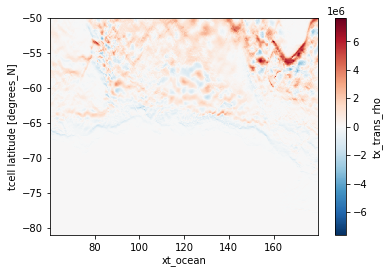

In [50]:
flux_x.plot()

In [51]:
dy = dy[1:,1:]
dx = dx[1:,1:]

In [52]:
yt_ocean = flux_x.yt_ocean
xt_ocean = flux_x.xt_ocean

In [53]:
# convert xarray to np array
dx = dx.values
dy = dy.values
flux_x = flux_x.values
flux_y = flux_y.values

# Resolve the equation U = grad(chi) + (-d(phi)/dy,d(phi/dx)), here we need to diagnose if du/dx + dv/dy = 0. If not 0, we also need to resolve the equation of chi: d(chi)/(dx^2) + d(chi)/(dy^2)

In [86]:
# set the matrix of the potential
du_dx = np.zeros((664,1198))
dv_dy = np.zeros((664,1198))
potential = np.zeros((664,1198))

In [97]:
# use the loop to resolvee the equation
for i in range(664):
    for j in range(1198):
        du_dx[i,j] = ((flux_x[i,j]-flux_x[i,j+1])/(dx[i,j]/2.+dx[i,j+1]/2.))
        dv_dy[i,j] = ((flux_y[i,j]-flux_y[i+1,j])/(dy[i,j]/2.+dy[i+1,j]/2.))
        potential[i,j] = du_dx[i,j] + dv_dy[i,j]

In [98]:
du_dx[500,:]

array([ 4.87428448,  9.45688756, 15.63989099, ..., 19.7579464 ,
       12.92050611, -0.67048691])

In [99]:
dv_dy[500,:]

array([ -4.87066383,  -9.44981568, -15.62815721, ..., -19.74316842,
       -12.91089828,   0.66991413])

In [101]:
Potential = xr.DataArray(potential, dims = ['yt_ocean','xt_ocean'], coords = [yt_ocean[:664],xt_ocean[:1198]])

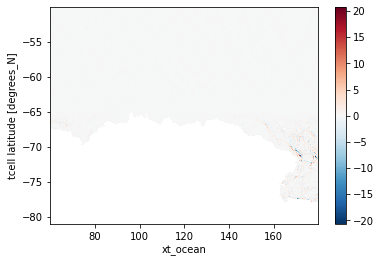

In [102]:
Potential.plot()

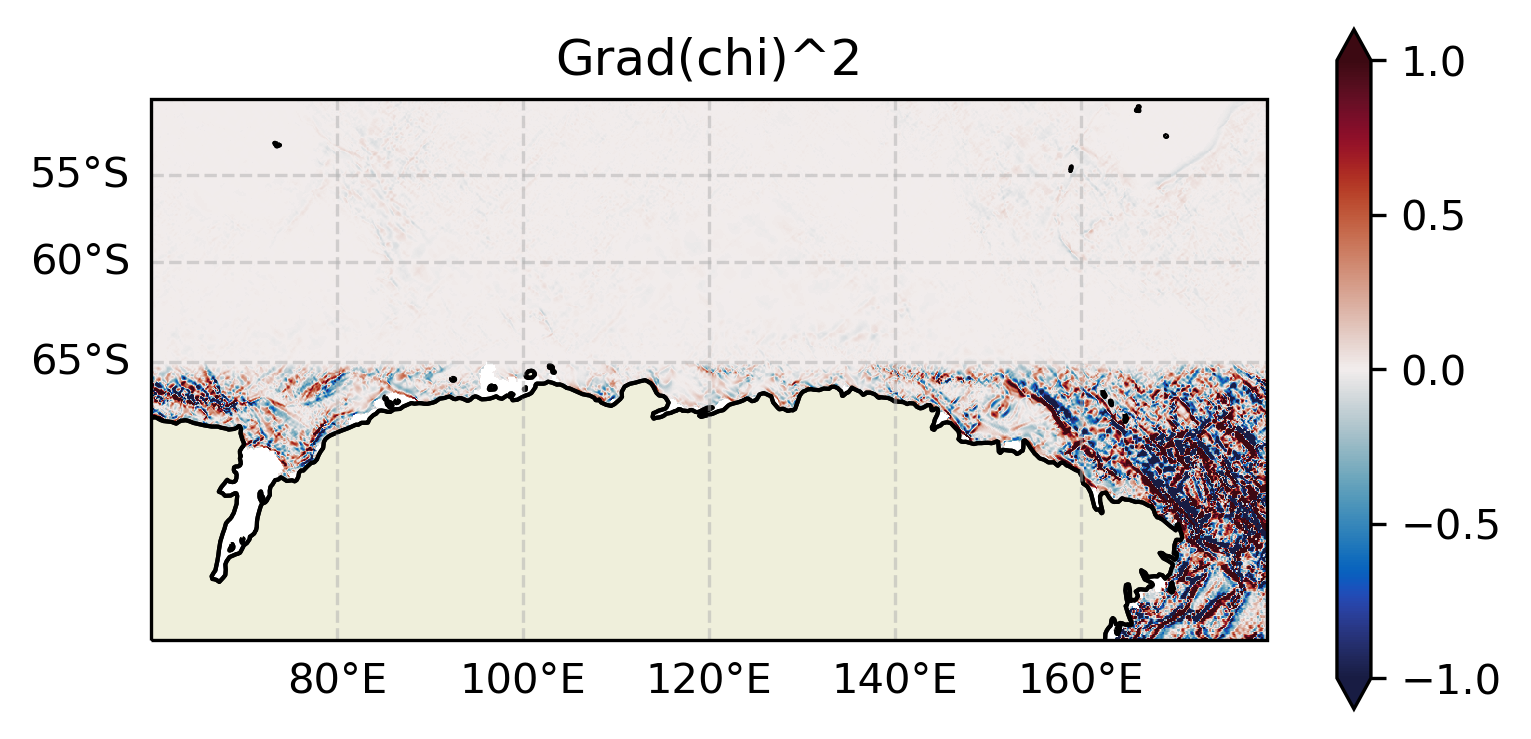

In [104]:
# 
projection=ccrs.Mercator(min_latitude=-75.0, max_latitude=-50.0)
#projection=ccrs.Stereographic(central_latitude=-72, central_longitude=120)
fig = plt.figure(figsize=(6, 3), dpi=300)
ax = plt.subplot(1, 1, 1, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([60, 180, -75, -50], crs=ccrs.PlateCarree())
lb =ax.gridlines(draw_labels=True,linestyle='--',alpha=0.5)
lb.xlabels_top = False
lb.ylabels_right = False
lb.ylocator = mticker.FixedLocator([-65, -60,-55])
p1 = Potential.plot(ax =ax, vmin = -1,vmax = 1, transform=ccrs.PlateCarree(),cmap=cm.cm.balance)
ax.coastlines(resolution='50m')
ax.set_extent([60, 180, -75, -50], crs=ccrs.PlateCarree())
ax.set_title('Grad(chi)^2')
ax. grid(False)